In [97]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
sns.set('notebook')

In [103]:
top_producers = [1729, 1892, 1918, 1994, 1998, 1999, 2030, 2091]
def retrieve_data():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        scores = pd.read_sql_table('classification', con)
        genetics = pd.read_sql_table('genetics', con)
    return pd.merge(left=scores, right=genetics, left_on='animal_id', right_on='animal_id').fillna(0)
data = retrieve_data().drop(columns=['name', 'category', 'date', 'index_x', 'date_calved', 'age'])

animal_ids = data['animal_id']
data = data.drop(columns=['animal_id'])

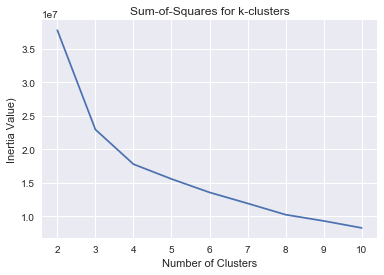

[0.46100662800822739, 0.44146509280500157, 0.37028889910122703, 0.31696414527680522, 0.32390443984126688, 0.33992976196140545, 0.34453471023080895, 0.34905946605151328, 0.32785823977913081]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


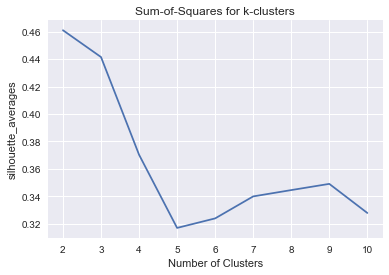

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

k_values = [x for x in range(2,11)]

interia_values = []
for k in k_values:
    clusterer = KMeans(n_clusters=k, random_state=25)
    interia_values.append(clusterer.fit(data).inertia_)
    cluster_labels = clusterer.predict(data)
    
plt.plot(k_values, interia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value)')
plt.title('Sum-of-Squares for k-clusters')
plt.show()  

silhouette_averages = []
for k in k_values:
    clusterer = KMeans(n_clusters=k, random_state=45)
    cluster_labels = clusterer.fit_predict(data)
    silhouette_averages.append(silhouette_score(data, cluster_labels))

print(silhouette_averages)
print(k_values)

plt.plot(k_values, silhouette_averages)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_averages')
plt.title('Sum-of-Squares for k-clusters')
plt.show()

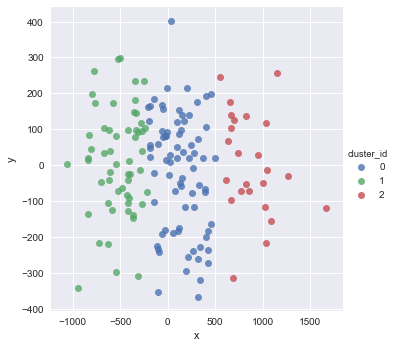

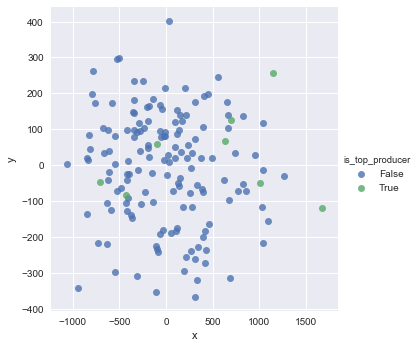

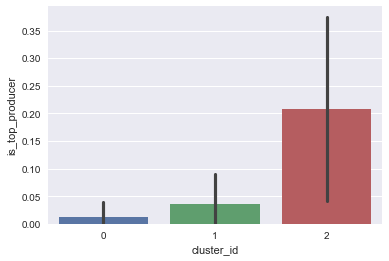

In [114]:
#your turn
from sklearn.decomposition import PCA
random_state = 25

pca_components = PCA(n_components=2, random_state=random_state).fit_transform(data)
cluster_labels = KMeans(n_clusters=3, random_state=random_state).fit_predict(data)
x = pca_components[:,0]
y = pca_components[:,1]

results = pd.DataFrame({'cluster_id':cluster_labels, 'x':x, 'y':y, 'animal_id':animal_ids})
results['is_top_producer'] = results['animal_id'].isin(top_producers)
results = results.drop_duplicates(subset=['animal_id'], keep='first')

sns.lmplot('x', 'y', data=results, hue='cluster_id', fit_reg=False)
sns.lmplot('x', 'y', data=results, hue='is_top_producer', fit_reg=False)
plt.show()

sns.barplot(data=results, x='cluster_id', y='is_top_producer')
plt.show()

In [ ]:
results

In [ ]:
results.drop_duplicates()